# 深度学习框架实战

## 山东理工大学 数学与统计学院 周世祥
 
## Keras卷积神经网络识别CIFAR图像集

In [1]:
import tensorflow as tf
tf.__version__

'1.2.1'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.2'

 

<img src="cifar.png" width = 70% alt="cifar图像集" />

共有10类，飞机，汽车，鸟，猫，鹿，狗，青蛙，马，船，卡车。

http://www.cs.toronto.edu/~kriz/cifar.html

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html



In [3]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#第一次执行cifar10.load_data()方法时，程序会检查是否有cifar-10-batches-py.tar文件
#如果没有会从网络下载，并解压缩文件，运行时间可能有点长。

### 数据准备

In [4]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

In [5]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))
#查看数据项数
#train训练数据有50000项
#test测试数据有10000项

train: 50000
test : 10000


### 查看训练数据

训练数据是由images与label所组成，y_label_train是图像数据真实值，每一个数字代表一种图像类别的名称，共有10个类别。

Images的shape形状：使用shape方法

In [6]:
x_img_train.shape
#第四项是3，表示RGB图像

(50000, 32, 32, 3)

In [7]:
x_img_test[0]
#第0项images的内容，每一个点是由RGB三原色所组成的

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ..., 
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ..., 
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ..., 
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ..., 
       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ..., 
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ..., 
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ..., 
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67,

In [8]:
y_label_train.shape
#

(50000, 1)

In [9]:
x_img_test.shape

(10000, 32, 32, 3)

In [10]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ..., 
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ..., 
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ..., 
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ..., 
       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ..., 
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ..., 
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ..., 
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67,

In [11]:
y_label_test.shape

(10000, 1)

In [12]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

用字典定义每一个数字所代表的图形类别的名称

In [13]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
#使用label_dict字典将label与prediction的0到9数字转换为图形类别名称


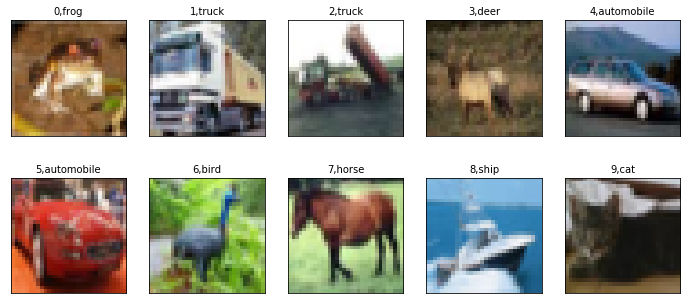

In [14]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)
#显示10项数据
#因为还没有预测数据，所用prediction参数输入为空


In [15]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


### Image normalize
照片图像特征features标准化，提高模型预测的准确度，并且收敛更快。



In [16]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [18]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [19]:
x_img_train_normalize[0][0][0]

array([ 0.23137255,  0.24313726,  0.24705882], dtype=float32)

#将label照片图像真实的值以一位有效编码进行转换

将训练数据与测试数据的label都编码，转换label 为OneHot Encoding

In [20]:
y_label_train.shape

(50000, 1)

In [21]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [23]:
y_label_train_OneHot.shape

(50000, 10)

In [24]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### 建立模型

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [26]:
model = Sequential()
#线性堆叠模型

In [27]:
#卷积层1

In [29]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
#32*32的图像，共产生32个图像
#filters=32：随机产生32个滤镜
#padding='same' 让卷积运算产生的卷积图像大小不变
#input_shape=(32, 32,3)彩色RGB图像

In [30]:
model.add(Dropout(rate=0.25))
#训练中随机放弃25%的神经元，避免过拟合

In [32]:
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立池化层1
#将32*32的图形缩减采样成16*16的图形

建立卷积层2与池化层2

In [33]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
#执行第二次卷积运算，将原本的32个图像转换为64个图像，卷积运算不会改变图像大小，所以
#图形大小仍然是16*16

In [34]:
model.add(Dropout(0.25))

In [36]:
model.add(MaxPooling2D(pool_size=(2, 2)))
#将16*16的图像缩减采样为缩小为8*8的图像

建立平坦层

In [37]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [38]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
#建立隐藏层，共1024个神经元

In [39]:
model.add(Dense(10, activation='softmax'))
#建立输出层

In [40]:
print(model.summary())
#模型摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
__________

加载之前训练的模型， 


In [41]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("加载模型成功!继续训练模型")
except :    
    print("加载模型失败!开始训练一个新模型")

加载模型失败!开始训练一个新模型


### 训练模型

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [43]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1) 
#开始训练，训练过程会存储在train_history变量中
#verbose=2显示训练过程

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 189s - loss: 1.6941 - acc: 0.3739 - val_loss: 1.5088 - val_acc: 0.4760
Epoch 2/10
40000/40000 [==============================] - 192s - loss: 1.3632 - acc: 0.5062 - val_loss: 1.3045 - val_acc: 0.5794
Epoch 3/10
40000/40000 [==============================] - 204s - loss: 1.1903 - acc: 0.5725 - val_loss: 1.1796 - val_acc: 0.5976
Epoch 4/10
40000/40000 [==============================] - 204s - loss: 1.0961 - acc: 0.6075 - val_loss: 1.1266 - val_acc: 0.6188
Epoch 5/10
40000/40000 [==============================] - 199s - loss: 1.0240 - acc: 0.6325 - val_loss: 1.0397 - val_acc: 0.6598
Epoch 6/10
40000/40000 [==============================] - 202s - loss: 0.9578 - acc: 0.6613 - val_loss: 0.9773 - val_acc: 0.6772
Epoch 7/10
40000/40000 [==============================] - 203s - loss: 0.9284 - acc: 0.6710 - val_loss: 0.9499 - val_acc: 0.6732
Epoch 8/10
40000/40000 [=======================

50000\*0.8=40000项作为训练数据，10000项作为验证数据。40000项数据分为每一批128项，所以大约分为160批次(40000/128=313)进行训练。

Epoch训练周期训练完成后，会计算这个训练周期的准确率与误差，并且在train_history中新增一项数据记录。


In [45]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
#画出准确率执行结果

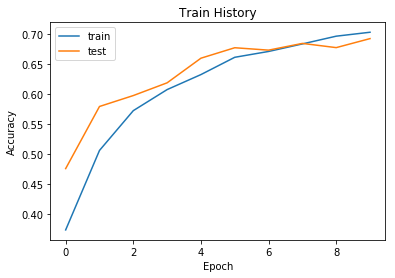

In [46]:
show_train_history('acc','val_acc')

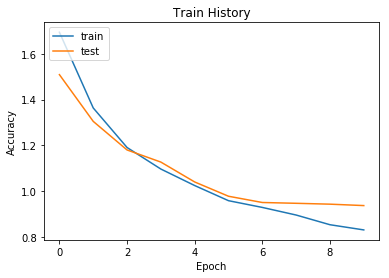

In [47]:
show_train_history('loss','val_loss')
#误差执行结果


### 评估模型的准确率

In [48]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]
#模型评价的准确率

0.68559999999999999

进行预测

In [49]:
prediction=model.predict_classes(x_img_test_normalize)

 9984/10000 [============================>.] - ETA: 0s

In [50]:
prediction[:10]
#查看前十项预测结果


array([3, 8, 8, 8, 6, 6, 1, 4, 3, 1], dtype=int64)

查看预测结果

In [51]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

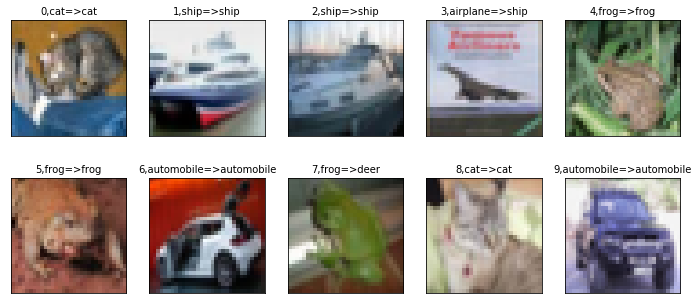

In [52]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

第3号图预测错误：真实值是airplain，但是预测值是ship；

### 查看预测概率

In [53]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [54]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))#设置图像大小
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))
#建立显示概率函数，y为真实值，predict为预测结果，x_img预测的图像，
#Predicted_Probability预测概率，i指开始显示的数据index        

label: cat predict: cat


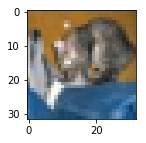

airplane Probability:0.000801388
automobile Probability:0.001107088
bird Probability:0.012050506
cat Probability:0.619248748
deer Probability:0.009993414
dog Probability:0.285810739
frog Probability:0.063496605
horse Probability:0.001948276
ship Probability:0.005124065
truck Probability:0.000419154


In [55]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

显示第0项数据项预测的概率，预测为“猫”的概率最大，其次为“狗”。

label: airplane predict: ship


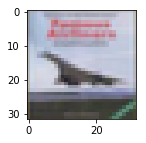

airplane Probability:0.280368030
automobile Probability:0.020851787
bird Probability:0.120755255
cat Probability:0.038287822
deer Probability:0.082998931
dog Probability:0.006645642
frog Probability:0.025652895
horse Probability:0.001673958
ship Probability:0.418284267
truck Probability:0.004481419


In [56]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)
#查看第3项数据预测的概率

这张照片被预测为“船”的概率最高，预测为“飞机”的概率次之，所以最后预测为“船”。但真实值为飞机，所以预测是错误的。


### 显示混淆矩阵
confusion matrix，pd.crosstab的输入都必须是一维数组，所以要先确认prediction预测结果与y_label_test真实值是一维数组。如果不是，需要先转换。

In [57]:
prediction.shape

(10000,)

In [58]:
y_label_test.shape
#是二维数组，需要转换

(10000, 1)

In [59]:
y_label_test

array([[3],
       [8],
       [8],
       ..., 
       [5],
       [1],
       [7]])

In [60]:
y_label_test.reshape(-1)
#转一维

array([3, 8, 8, ..., 5, 1, 7])

使用建立混淆矩阵

In [61]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,676,10,88,30,50,12,38,3,58,35
1,19,775,6,14,9,9,56,0,15,97
2,36,0,525,45,150,76,151,5,8,4
3,8,1,59,446,116,185,174,8,1,2
4,5,1,22,36,806,17,98,10,5,0
5,4,1,36,136,98,651,69,4,0,1
6,1,0,21,21,34,13,909,0,1,0
7,2,0,55,51,257,125,29,473,1,7
8,39,21,26,45,28,5,27,0,786,23


In [62]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


从以上混淆矩阵，可以看出：

1. 对角线是预测正确的，
   1. 真实值是6蛙，被正确预测为6的项数有909项，最高，最不容易混淆；
   2. 真实值3是猫，被正确预测为3的项数为446项，最低，也就是说最容易混淆。
   
2. 其他非对角线数字，代表将某一个标签错误预测成为另一个标签，最容易混淆：

   1. 真实值为7马，但预测值是4鹿，项数有257项，最高，也就是马容易被误认为鹿；   
   2. 真实值是3猫，但预测为5狗的项数有185项，次高，也就是说狗很容易被误认为是猫，人类识别也很容易搞错狗和猫。
   
3. 动物类不容易混淆为交通工具类。

### 模型的保存与加载

In [64]:
#Save model to JSON
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)
#因为程序训练要花很长时间，有时可能因为某种原因宕机，之前的训练就前功尽弃，
#所以每次训练完成后将模型的权重保存一下 ，
#下次程序执行训练之前，先加载模型权重，再继续训练


In [65]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
#Save Model to YAML

In [66]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")
#保存到硬盘

Saved model to disk


```
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("加载模型成功!继续训练模型")
except :    
    print("加载模型失败!开始训练一个新模型")
```
下次执行程序继续训练之前重新加载。

为提高识别率，建立3次卷积运算的神经网络。
## 参考文献

1. TensorFlow+Keras深度学习人工智能实践应用，林大贵，清华大学出版社，2018.